In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
import pandas as pd
submission = pd.read_csv("../input/titanic/gender_submission.csv")
df_test = pd.read_csv("../input/titanic/test.csv")
df_train = pd.read_csv("../input/titanic/train.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
print('\n ### 학습 데이터 정보 ### \n')
print(df_train.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_train['Cabin'].fillna('N', inplace=True)
df_train['Embarked'].fillna('N',inplace=True)

df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Cabin'].fillna('N', inplace=True)
df_test['Embarked'].fillna('N', inplace=True)

print('데이터 세트 Null값 개수 ', df_train.isnull().sum().sum())

데이터 세트 Null값 개수  0


In [6]:
print('Sex 값 분포 :\n', df_train['Sex'].value_counts())
print('\n Cabin 값 분포 : \n', df_train['Cabin'].value_counts())
print('\n Embarked 값 분포 : \n', df_train['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 : 
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
D                3
              ... 
F G63            1
C128             1
A10              1
D47              1
F38              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


# EDA

In [7]:
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

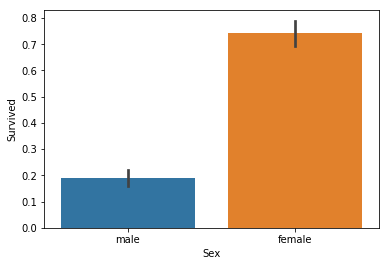

In [8]:
sns.barplot(x='Sex',y='Survived', data=df_train)

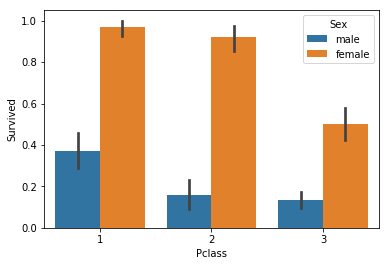

In [9]:
sns.barplot(x='Pclass',y='Survived', hue='Sex', data=df_train)

In [10]:
df_train[df_train['Age']<=0]

# 밑에 나이별 categorization에서 -1은 unknown으로 분류하지만 실제로 값은 존재하지 않음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


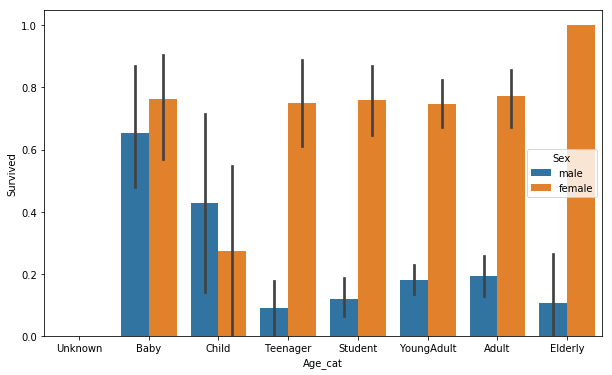

In [11]:
#입력 age에 따라 구분 값을 반환하는 함수 설정, apply lambda 식에 사용

def get_category(age):
    cat=''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'YoungAdult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','YoungAdult','Adult','Elderly']

#lambda 식에 위에서 생성한 함수를 반환값으로 지정
#get_category(X)는 입력값으로 'Age'칼럼 값을 받아서 해당하는 cat 반환

df_train['Age_cat'] = df_train['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex',data=df_train, order=group_names)
df_train.drop('Age_cat',axis=1, inplace=True)
                                        

In [12]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

df_train = encode_features(df_train)
df_test = encode_features(df_test)

df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,3


### 데이터의 전처리를 전체적으로 호출하는 함수는 transform_features()이며 Null처리, 포매팅, 인코딩을 수행하는 내부함수로 구성

In [13]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df
#ML Algorithm에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df
#레이블 인코딩 수행
def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df
#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [14]:
# 피처 데이터세트와 레이블 데이터세트 추출

df_train = pd.read_csv("../input/titanic/train.csv")

y_df_train = df_train['Survived']
X_df_train = df_train.drop('Survived',axis=1)
X_df_train = transform_features(X_df_train)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df_train, y_df_train, test_size=0.2, random_state=11)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, RandomForest, 로지스틱 회귀를 위한 sklearn Classifier 클래스 생성
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#RandomForestClassifier
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7933
RandomForestClassifier 정확도 : 0.8436
LogisticRegression 정확도 : 0.8492


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold=KFold(n_splits=folds)
    scores=[]

    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_df_train)):
        #X_df_train 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_df_train.values[train_index], X_df_train.values[test_index]
        y_train, y_test = y_df_train.values[train_index], y_df_train.values[test_index]
        #Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 : {1:4f}'.format(iter_count, accuracy))
        #평균 정확도 계산
        mean_score = np.mean(scores)
        print("평균 정확도 : {0:.4f}".format(mean_score))

        
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도 : 0.748603
평균 정확도 : 0.7486
교차 검증 1 정확도 : 0.752809
평균 정확도 : 0.7507
교차 검증 2 정확도 : 0.792135
평균 정확도 : 0.7645
교차 검증 3 정확도 : 0.780899
평균 정확도 : 0.7686
교차 검증 4 정확도 : 0.837079
평균 정확도 : 0.7823


In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_df_train, y_df_train, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7486
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7978
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7857


In [18]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print("GridSearchCV 최고 정확도 : {0:.4f}".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}".format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


In [19]:
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,76,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,76,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,76,1


In [20]:
df_test = pd.read_csv("../input/titanic/test.csv")
transform_features(df_test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.50000,0,0,7.8292,7,1
1,3,0,47.00000,1,0,7.0000,7,2
2,2,1,62.00000,0,0,9.6875,7,1
3,3,1,27.00000,0,0,8.6625,7,2
4,3,0,22.00000,1,1,12.2875,7,2
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,7,2
414,1,0,39.00000,0,0,108.9000,2,0
415,3,1,38.50000,0,0,7.2500,7,2
416,3,1,30.27259,0,0,8.0500,7,2


In [21]:
predictions = best_dclf.predict(df_test)

In [22]:
'''
grid_rclf = GridSearchCV(rf_clf, param_grid = parameters, scoring = 'accuracy', cv=5)
grid_rclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_rclf.best_params_)
print("GridSearchCV 최고 정확도 : {0:.4f}".format(grid_rclf.best_score_))
best_rclf = grid_rclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 estimator로 예측 및 평가 수행
dpredictions = best_rclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서의 RandomForesteClassifier 정확도 : {0:.4f}".format(accuracy))
'''

'\ngrid_rclf = GridSearchCV(rf_clf, param_grid = parameters, scoring = \'accuracy\', cv=5)\ngrid_rclf.fit(X_train, y_train)\n\nprint(\'GridSearchCV 최적 하이퍼 파라미터 :\', grid_rclf.best_params_)\nprint("GridSearchCV 최고 정확도 : {0:.4f}".format(grid_rclf.best_score_))\nbest_rclf = grid_rclf.best_estimator_\n\n#GridSearchCV의 최적 하이퍼 파라미터로 학습된 estimator로 예측 및 평가 수행\ndpredictions = best_rclf.predict(X_test)\naccuracy = accuracy_score(y_test, dpredictions)\nprint("테스트 세트에서의 RandomForesteClassifier 정확도 : {0:.4f}".format(accuracy))\n'

In [23]:
submission['Survived'] = predictions

In [24]:
submission.to_csv('./my_second_submission.csv', index=False)